In [1]:
import pickle
import numpy as np
import torch
from sklearn.decomposition import PCA

In [2]:
with open("embeddings_160000.pkl", "rb") as f:
    embedding_dicts_list = pickle.load(f)

In [3]:
# inverting original dictionary 
layer_names = ['roberta.encoder.layer.0.output.dense.weight',
'roberta.encoder.layer.1.output.dense.weight',
'roberta.encoder.layer.2.output.dense.weight',
'roberta.encoder.layer.3.output.dense.weight',
'roberta.encoder.layer.4.output.dense.weight',
'roberta.encoder.layer.5.output.dense.weight',
'roberta.encoder.layer.6.output.dense.weight',
'roberta.encoder.layer.7.output.dense.weight',
'roberta.encoder.layer.8.output.dense.weight',
'roberta.encoder.layer.9.output.dense.weight',
'roberta.encoder.layer.10.output.dense.weight',
'roberta.encoder.layer.11.output.dense.weight',
'lm_head.dense.weight',]

embeddings_per_layer = {layer_name: {} for layer_name in layer_names}

for language, emb_dict in embedding_dicts_list.items():
    for layer, emb in emb_dict.items():
        embeddings_per_layer[layer][language] = emb

In [4]:
import matplotlib.pyplot as plt
import random

In [5]:
pca = PCA(n_components=3)

Variance explained for layer roberta.encoder.layer.0.output.dense.weight: 
[0.2799108  0.19097012 0.18284073]
Variance explained for layer roberta.encoder.layer.1.output.dense.weight: 
[0.42394403 0.19945501 0.14924403]
Variance explained for layer roberta.encoder.layer.2.output.dense.weight: 
[0.61727613 0.14616415 0.08502547]
Variance explained for layer roberta.encoder.layer.3.output.dense.weight: 
[0.6765249  0.1229818  0.06351577]
Variance explained for layer roberta.encoder.layer.4.output.dense.weight: 
[0.6551841  0.10745735 0.07151183]
Variance explained for layer roberta.encoder.layer.5.output.dense.weight: 
[0.618475   0.11598646 0.0803728 ]
Variance explained for layer roberta.encoder.layer.6.output.dense.weight: 
[0.5828377  0.13687804 0.08825132]
Variance explained for layer roberta.encoder.layer.7.output.dense.weight: 
[0.60726714 0.13658297 0.09007411]
Variance explained for layer roberta.encoder.layer.8.output.dense.weight: 
[0.48245645 0.2376663  0.08429845]
Variance e

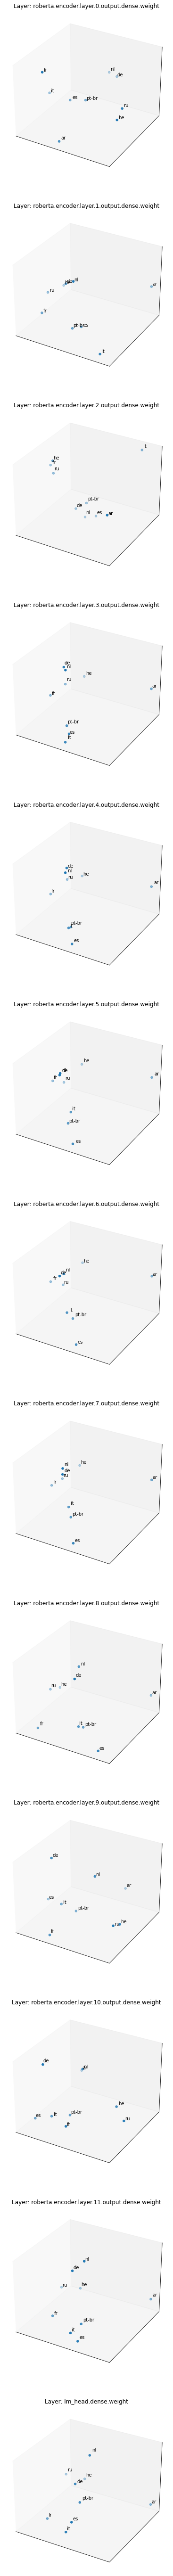

In [6]:
num_layers = len(embeddings_per_layer)
fig = plt.figure(figsize=(50,100))

#fig, ax = plt.subplots(len(embeddings_per_layer), figsize=(10,50)

for layer_idx, (layer, language_emb_dict) in enumerate(embeddings_per_layer.items()):
    
    languages = language_emb_dict.keys() 
    embs = torch.stack(list(language_emb_dict.values())).numpy()
    
    mean_embs = np.mean(embs, axis=0)
    std_embs = np.std(embs, axis=0)
    embs = (embs - mean_embs)/std_embs
    
    pca_embs = pca.fit_transform(embs)
    print(f"Variance explained for layer {layer}: ")
    print(pca.explained_variance_ratio_)
    
    ax = fig.add_subplot(num_layers, 1, layer_idx+1, projection='3d')
    
    ax.scatter3D(pca_embs[:, 0], pca_embs[:, 1], pca_embs[:, 2])
    for idx, language in enumerate(languages):
        ax.text(pca_embs[idx, 0]+random.random(), pca_embs[idx, 1]+random.random(), pca_embs[idx, 2]+random.random(), language)
        #ax.text(language, (pca_embs[idx, 0],pca_embs[idx, 1]), xytext=(pca_embs[idx, 0], pca_embs[idx, 1]))
    ax.title.set_text(f"Layer: {layer}")
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
    ax.axes.zaxis.set_ticks([])
    
    
